In [4]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sborn

In [8]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [9]:
# Read the dataset
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/obesity.csv")

In [10]:
# Display the first few rows of the dataset
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
# Check the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Perform preprocessing steps

In [12]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [13]:
# Convert categorical variables to numerical representation
data["Gender"] = data["Gender"].map({"Female": 0, "Male": 1})
data["family_history_with_overweight"] = data["family_history_with_overweight"].map({"no": 0, "yes": 1})
data["FAVC"] = data["FAVC"].map({"no": 0, "yes": 1})
data["CAEC"] = data["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
data["SMOKE"] = data["SMOKE"].map({"no": 0, "yes": 1})
data["SCC"] = data["SCC"].map({"no": 0, "yes": 1})
data["CALC"] = data["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
data["MTRANS"] = data["MTRANS"].map({"Public_Transportation": 0, "Automobile": 1, "Motorbike": 2, "Walking": 3, "Bike": 4})

In [14]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II


# Visualization

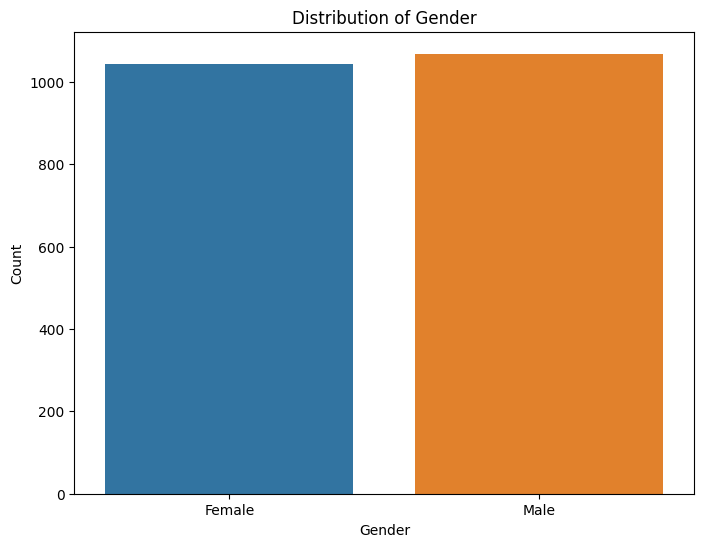

In [15]:
# Count plot for Gender
mp.figure(figsize=(8, 6))
sborn.countplot(x="Gender", data=data)
mp.xlabel("Gender")
mp.ylabel("Count")
mp.title("Distribution of Gender")
mp.xticks([0, 1], ["Female", "Male"])  # Add custom x-axis labels
mp.show()

Count plot for Gender:

This visualization uses a count plot to show the distribution of genders in the dataset.
It displays the number of occurrences of each gender category (0 for Female, 1 for Male).
The x-axis represents the gender categories, and the y-axis represents the count.

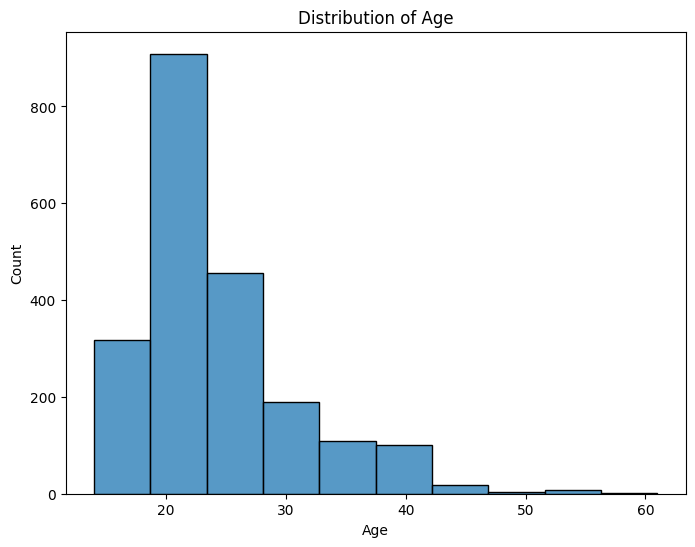

In [16]:
# Histogram for Age
mp.figure(figsize=(8, 6))
sborn.histplot(data["Age"], bins=10)
mp.xlabel("Age")
mp.ylabel("Count")
mp.title("Distribution of Age")
mp.show()


Histogram for Age:

This histogram displays the distribution of ages in the dataset.
It shows the frequency of different age ranges (bins) on the x-axis and the count on the y-axis.

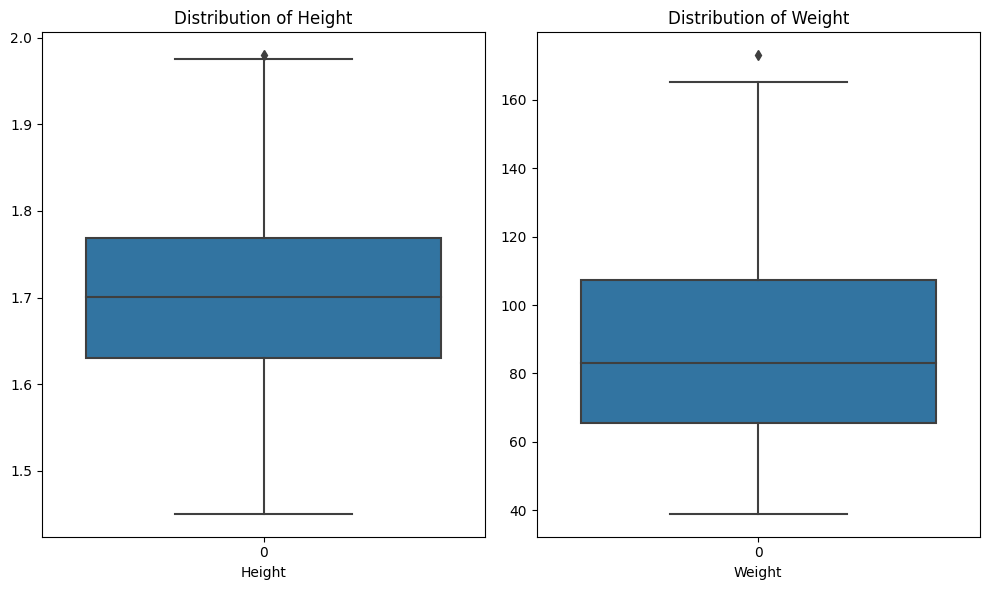

In [17]:
# Box plot for Height and Weight
mp.figure(figsize=(10, 6))
mp.subplot(1, 2, 1)
sborn.boxplot(data["Height"])
mp.xlabel("Height")
mp.title("Distribution of Height")

mp.subplot(1, 2, 2)
sborn.boxplot(data["Weight"])
mp.xlabel("Weight")
mp.title("Distribution of Weight")

mp.tight_layout()
mp.show()

Box plots for Height and Weight:

Two box plots are shown side by side, one for the distribution of heights and the other for weights.
The box plots provide information about the median, quartiles, and potential outliers in the data.
The x-axis represents the variables (Height and Weight), and the y-axis represents the corresponding values.

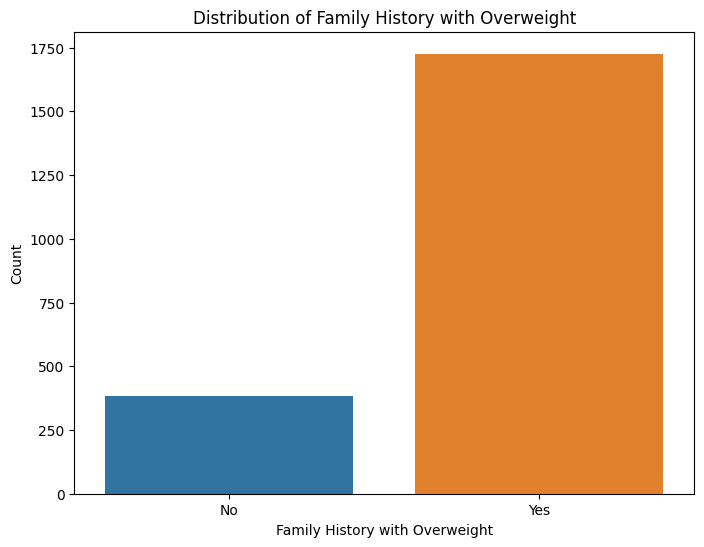

In [18]:
# Bar plot for family_history_with_overweight
mp.figure(figsize=(8, 6))
sborn.countplot(x="family_history_with_overweight", data=data)
mp.xlabel("Family History with Overweight")
mp.ylabel("Count")
mp.title("Distribution of Family History with Overweight")
mp.xticks([0, 1], ["No", "Yes"])  # Add custom x-axis labels
mp.show()

Bar plot for family_history_with_overweight:

This bar plot represents the distribution of the family history of overweight in the dataset.
It shows the count of individuals with and without a family history of overweight.
The x-axis represents the family history categories (No and Yes), and the y-axis represents the count.

<ipython-input-19-259eb5f161b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sborn.heatmap(data.corr(), annot=True, cmap="coolwarm")


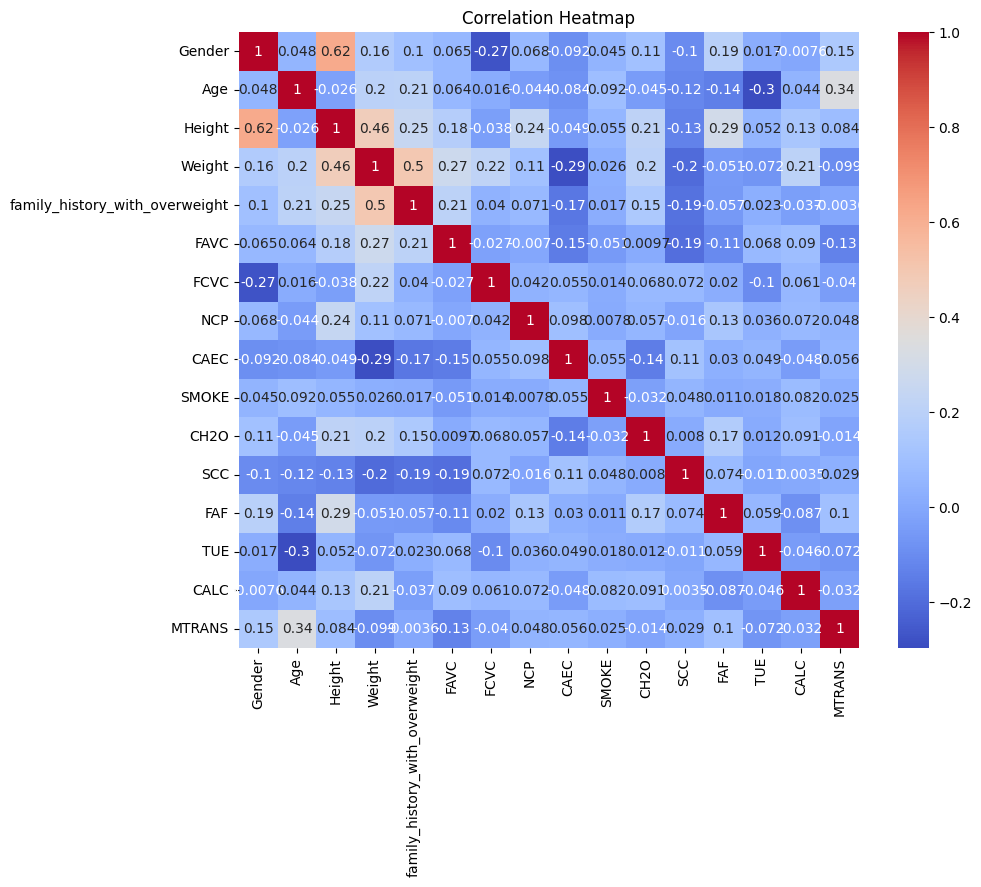

In [19]:
# Correlation heatmap
mp.figure(figsize=(10, 8))
sborn.heatmap(data.corr(), annot=True, cmap="coolwarm")
mp.title("Correlation Heatmap")
mp.show()

Correlation heatmap:

This visualization presents a correlation heatmap of the dataset's variables.
It uses colors to indicate the strength and direction of the correlations between pairs of variables.
The heatmap helps identify relationships and dependencies between different features.

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
from sklearn.feature_selection import SelectKBest, chi2
# Split the data into training and testing sets
X = data.drop("NObeyesdad", axis=1)
y = data["NObeyesdad"]

selector = SelectKBest(chi2, k=10)  # Select top 5 features
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Machine Learning Algorithm: Random Forest

In [22]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Evaluate Random Forest model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9219858156028369
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.93      0.92        56
      Normal_Weight       0.84      0.82      0.83        62
     Obesity_Type_I       0.95      0.94      0.94        78
    Obesity_Type_II       0.95      0.97      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.89      0.87        56
Overweight_Level_II       0.96      0.90      0.93        50

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423



# Deep Learning Algorithm: Multi-Layer Perceptron

In [23]:
# Multi-Layer Perceptron with hyperparameter tuning
mlp_model = MLPClassifier(random_state=42)
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'logistic'],
}
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)

# Evaluate Multi-Layer Perceptron model
best_mlp_model = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Multi-Layer Perceptron:")
print("Best Parameters:", grid_search_mlp.best_params_)
print("Accuracy:", accuracy_mlp)
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Model Comparison
print("Model Comparison:")
print("Random Forest Accuracy:", accuracy_rf)
print("Multi-Layer Perceptron Accuracy:", accuracy_mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Multi-Layer Perceptron:
Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100,)}
Accuracy: 0.7683215130023641
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.84      0.85        56
      Normal_Weight       0.74      0.60      0.66        62
     Obesity_Type_I       0.80      0.78      0.79        78
    Obesity_Type_II       0.82      0.95      0.88        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.53      0.62      0.57        56
Overweight_Level_II       0.61      0.54      0.57        50

           accuracy                           0.77       423
          macro avg       0.76      0.76      0.76       423
       weighted avg       0.77      0.77      0.77       423

Model Comparison:
Random Forest Accuracy: 0.9219858156028369
Multi-Layer Perceptron Accuracy: 0.7683215130023641


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


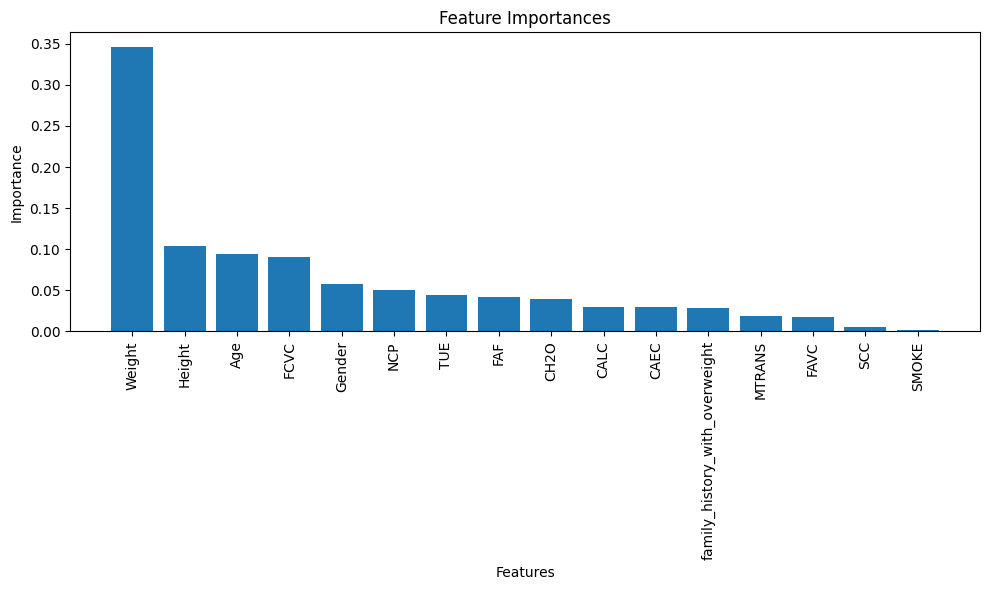

In [24]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Visualize feature importances
mp.figure(figsize=(10, 6))
mp.title("Feature Importances")
mp.bar(range(X.shape[1]), importances[indices], align="center")
mp.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
mp.xlabel("Features")
mp.ylabel("Importance")
mp.tight_layout()
mp.show()